# **CDD - CCR5 : Exploratory Data Analysis Part 02**

Khalid El Akri

[*'Chem Code Professor' YouTube channel*](http://youtube.com/@chemcodeprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the Bindingdb bioactivity data.

In this **Part 02**, we will be performing Descriptor Calculation and Exploratory Data Analysis. Let get started! Shall we ;)

---

## **Install rdkit**

In [1]:
! pip install rdkit

## **Load SOAT-2 bioactivity data**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('final_output.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [5]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [6]:
df_lipinski = lipinski(df.mol_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [7]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,502.625,5.47924,0.0,4.0
1,482.672,5.99584,0.0,4.0
2,612.196,5.49634,3.0,6.0
3,487.688,5.20134,0.0,3.0
4,506.706,6.21940,1.0,3.0
...,...,...,...,...
2941,678.893,8.35370,1.0,6.0
2942,666.882,7.60620,1.0,6.0
2943,484.482,5.63714,1.0,3.0
2944,658.781,6.96830,1.0,6.0


In [8]:
df

,mol_bdID,mol_smiles,bioactivity_class,mol_IC50
0,50853863,Cc1ccnc(C)c1C(=O)N1CCC(C)(N2CCN([C@@H](C)c3ccc...,active,0.5
1,50961778,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(N(c3ccccc3)c3c...,active,0.5
2,50448211,Cc1cc(Cl)nc(C)c1C(=O)NCC[C@@H](C)N1CCC(N(Cc2cc...,active,0.5
3,50417247,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(N(Cc3ccccc3)C(...,active,0.5
4,50260844,O=C(O)[C@@H](CC1CCC1)N1C[C@H](CN2CCC(CCCc3cccc...,active,0.5
...,...,...,...,...
2941,50260998,CCn1nc(Cc2ccc(Oc3ccccc3)cc2)cc1C1CCN(C[C@H]2CN...,active,0.5
2942,50264307,CC[C@@H](C)[C@H](C(=O)O)N1C[C@H](CN2CCC(c3cc(C...,active,0.5
2943,50260929,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(Nc3ccc(Br)cc3)...,active,0.5
2944,50260935,CC[C@@H](C)[C@H](C(=O)O)N1C[C@H](CN2CCC(c3cc(C...,active,0.5


In [9]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [10]:
df_combined

,mol_bdID,mol_smiles,bioactivity_class,mol_IC50,MW,LogP,NumHDonors,NumHAcceptors
0,50853863,Cc1ccnc(C)c1C(=O)N1CCC(C)(N2CCN([C@@H](C)c3ccc...,active,0.5,502.625,5.47924,0.0,4.0
1,50961778,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(N(c3ccccc3)c3c...,active,0.5,482.672,5.99584,0.0,4.0
2,50448211,Cc1cc(Cl)nc(C)c1C(=O)NCC[C@@H](C)N1CCC(N(Cc2cc...,active,0.5,612.196,5.49634,3.0,6.0
3,50417247,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(N(Cc3ccccc3)C(...,active,0.5,487.688,5.20134,0.0,3.0
4,50260844,O=C(O)[C@@H](CC1CCC1)N1C[C@H](CN2CCC(CCCc3cccc...,active,0.5,506.706,6.21940,1.0,3.0
...,...,...,...,...,...,...,...,...
2941,50260998,CCn1nc(Cc2ccc(Oc3ccccc3)cc2)cc1C1CCN(C[C@H]2CN...,active,0.5,678.893,8.35370,1.0,6.0
2942,50264307,CC[C@@H](C)[C@H](C(=O)O)N1C[C@H](CN2CCC(c3cc(C...,active,0.5,666.882,7.60620,1.0,6.0
2943,50260929,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(Nc3ccc(Br)cc3)...,active,0.5,484.482,5.63714,1.0,3.0
2944,50260935,CC[C@@H](C)[C@H](C(=O)O)N1C[C@H](CN2CCC(c3cc(C...,active,0.5,658.781,6.96830,1.0,6.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``mol_IC50`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``mol_IC50`` column and create a new ``pIC50`` column

In [11]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['mol_IC50_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns='mol_IC50_norm')
        
    return x

#### Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [12]:
df_combined.mol_IC50.describe()

count    2.946000e+03
mean     2.096260e+04
std      3.279139e+05
min      3.000000e-03
25%      3.700000e+00
50%      3.000000e+01
75%      4.500000e+02
max      1.000000e+07
Name: mol_IC50, dtype: float64

In [13]:
-np.log10( (10**-9)* 100000000 )

1.0

In [14]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [15]:
def norm_value(input):
    norm = []

    for i in input['mol_IC50']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['mol_IC50_norm'] = norm
    x = input.drop(labels='mol_IC50', axis=1)
        
    return x

#### We will first apply the norm_value() function so that the values in the standard value of mol_IC50 column is normalized.

In [16]:
df_norm = norm_value(df_combined)
df_norm

,mol_bdID,mol_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,mol_IC50_norm
0,50853863,Cc1ccnc(C)c1C(=O)N1CCC(C)(N2CCN([C@@H](C)c3ccc...,active,502.625,5.47924,0.0,4.0,0.5
1,50961778,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(N(c3ccccc3)c3c...,active,482.672,5.99584,0.0,4.0,0.5
2,50448211,Cc1cc(Cl)nc(C)c1C(=O)NCC[C@@H](C)N1CCC(N(Cc2cc...,active,612.196,5.49634,3.0,6.0,0.5
3,50417247,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(N(Cc3ccccc3)C(...,active,487.688,5.20134,0.0,3.0,0.5
4,50260844,O=C(O)[C@@H](CC1CCC1)N1C[C@H](CN2CCC(CCCc3cccc...,active,506.706,6.21940,1.0,3.0,0.5
...,...,...,...,...,...,...,...,...
2941,50260998,CCn1nc(Cc2ccc(Oc3ccccc3)cc2)cc1C1CCN(C[C@H]2CN...,active,678.893,8.35370,1.0,6.0,0.5
2942,50264307,CC[C@@H](C)[C@H](C(=O)O)N1C[C@H](CN2CCC(c3cc(C...,active,666.882,7.60620,1.0,6.0,0.5
2943,50260929,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(Nc3ccc(Br)cc3)...,active,484.482,5.63714,1.0,3.0,0.5
2944,50260935,CC[C@@H](C)[C@H](C(=O)O)N1C[C@H](CN2CCC(c3cc(C...,active,658.781,6.96830,1.0,6.0,0.5


In [17]:
df_norm.mol_IC50_norm.describe()

count    2.946000e+03
mean     2.096260e+04
std      3.279139e+05
min      3.000000e-03
25%      3.700000e+00
50%      3.000000e+01
75%      4.500000e+02
max      1.000000e+07
Name: mol_IC50_norm, dtype: float64

In [18]:
df_final = pIC50(df_norm)
df_final

,mol_bdID,mol_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,50853863,Cc1ccnc(C)c1C(=O)N1CCC(C)(N2CCN([C@@H](C)c3ccc...,active,502.625,5.47924,0.0,4.0,9.30103
1,50961778,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(N(c3ccccc3)c3c...,active,482.672,5.99584,0.0,4.0,9.30103
2,50448211,Cc1cc(Cl)nc(C)c1C(=O)NCC[C@@H](C)N1CCC(N(Cc2cc...,active,612.196,5.49634,3.0,6.0,9.30103
3,50417247,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(N(Cc3ccccc3)C(...,active,487.688,5.20134,0.0,3.0,9.30103
4,50260844,O=C(O)[C@@H](CC1CCC1)N1C[C@H](CN2CCC(CCCc3cccc...,active,506.706,6.21940,1.0,3.0,9.30103
...,...,...,...,...,...,...,...,...
2941,50260998,CCn1nc(Cc2ccc(Oc3ccccc3)cc2)cc1C1CCN(C[C@H]2CN...,active,678.893,8.35370,1.0,6.0,9.30103
2942,50264307,CC[C@@H](C)[C@H](C(=O)O)N1C[C@H](CN2CCC(c3cc(C...,active,666.882,7.60620,1.0,6.0,9.30103
2943,50260929,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(Nc3ccc(Br)cc3)...,active,484.482,5.63714,1.0,3.0,9.30103
2944,50260935,CC[C@@H](C)[C@H](C(=O)O)N1C[C@H](CN2CCC(c3cc(C...,active,658.781,6.96830,1.0,6.0,9.30103


In [19]:
df_final.pIC50.describe()

count    2946.000000
mean        7.306422
std         1.473506
min         2.000000
25%         6.346787
50%         7.522879
75%         8.431798
max        11.522879
Name: pIC50, dtype: float64

In [20]:
df_final.to_csv('CCR5_bioa_data_preprocessed.csv', index=False)

In [21]:
! ls -l

total 83680
-rw-r--r--@ 1 akrikhalid  staff  22654982 May 29 20:39 C-C chemokine receptor type 5_Inhibitors_3316.sdf
-rw-r--r--@ 1 akrikhalid  staff   5861006 May 29 20:38 C-C chemokine receptor type 5_Inhibitors_3316.tsv
-rw-r--r--  1 akrikhalid  staff    437936 Jun  5 22:57 CCR5_bioa_data_preprocessed.csv
-rw-r--r--@ 1 akrikhalid  staff    239166 Jun  5 22:54 CCR5_inhibitors 3316_Part 01.ipynb
-rw-r--r--@ 1 akrikhalid  staff    250629 Jun  5 22:56 CCR5_inhibitors 3316_Part 02.ipynb
-rw-r--r--@ 1 akrikhalid  staff     89689 May 29 10:53 CCR5_inhibitors 3316_Part 03.ipynb
-rw-r--r--@ 1 akrikhalid  staff     76160 May 29 11:06 CCR5_inhibitors 3316_Part 04.ipynb
-rw-r--r--@ 1 akrikhalid  staff    563191 May 29 11:20 CCR5_inhibitors 3316_Part_05.ipynb
-rw-r--r--  1 akrikhalid  staff   6052996 Jun  5 22:49 Output3_C-C chemokine receptor type 5_Inhibitors_3316.csv
-rw-r--r--  1 akrikhalid  staff    275282 Jun  5 22:53 final_output.csv
-rw-r--r--  1 akrikhalid  staff    240163 Jun  5 22:48 o

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [22]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,mol_bdID,mol_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,50853863,Cc1ccnc(C)c1C(=O)N1CCC(C)(N2CCN([C@@H](C)c3ccc...,active,502.625,5.47924,0.0,4.0,9.30103
1,50961778,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(N(c3ccccc3)c3c...,active,482.672,5.99584,0.0,4.0,9.30103
2,50448211,Cc1cc(Cl)nc(C)c1C(=O)NCC[C@@H](C)N1CCC(N(Cc2cc...,active,612.196,5.49634,3.0,6.0,9.30103
3,50417247,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(N(Cc3ccccc3)C(...,active,487.688,5.20134,0.0,3.0,9.30103
4,50260844,O=C(O)[C@@H](CC1CCC1)N1C[C@H](CN2CCC(CCCc3cccc...,active,506.706,6.21940,1.0,3.0,9.30103
...,...,...,...,...,...,...,...,...
2941,50260998,CCn1nc(Cc2ccc(Oc3ccccc3)cc2)cc1C1CCN(C[C@H]2CN...,active,678.893,8.35370,1.0,6.0,9.30103
2942,50264307,CC[C@@H](C)[C@H](C(=O)O)N1C[C@H](CN2CCC(c3cc(C...,active,666.882,7.60620,1.0,6.0,9.30103
2943,50260929,Cc1cccc(C)c1C(=O)N1CCC(C)(N2CCC(Nc3ccc(Br)cc3)...,active,484.482,5.63714,1.0,3.0,9.30103
2944,50260935,CC[C@@H](C)[C@H](C(=O)O)N1C[C@H](CN2CCC(c3cc(C...,active,658.781,6.96830,1.0,6.0,9.30103


#### Now we have only 2680 entries instead of 2945 entries 

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [23]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

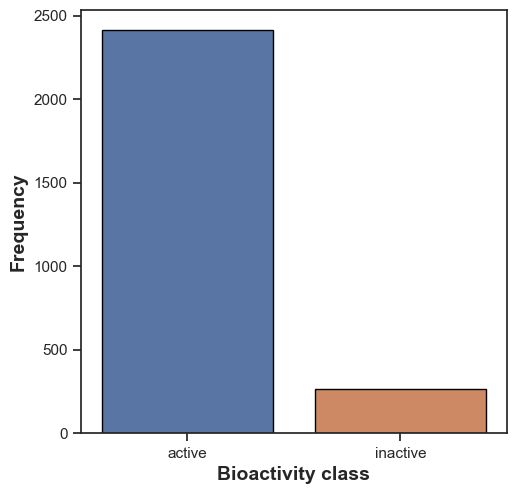

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

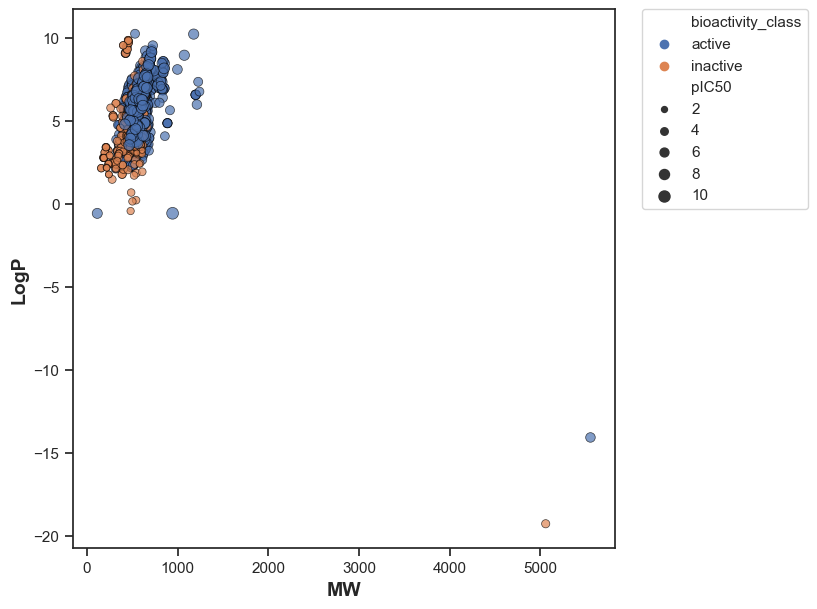

In [27]:
plt.figure(figsize=(7, 7))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

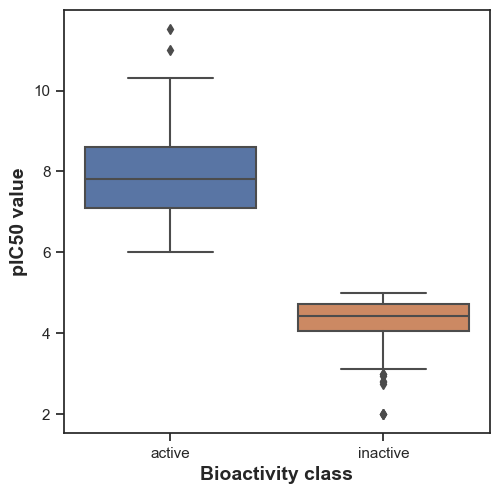

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [29]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [30]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,639710.0,9.294517e-158,0.05,Different distribution (reject H0)


#### **MW**

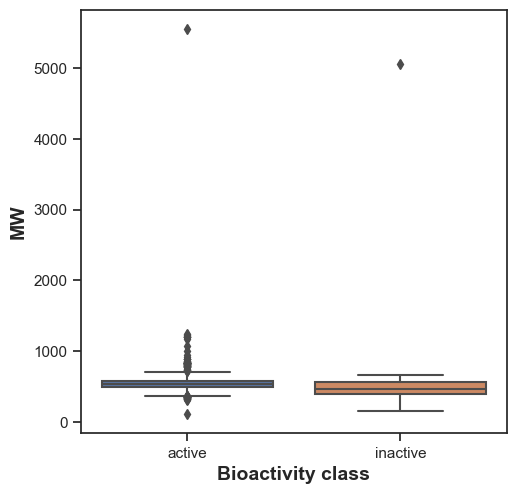

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [32]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,450467.0,8.533176e-28,0.05,Different distribution (reject H0)


#### **LogP**

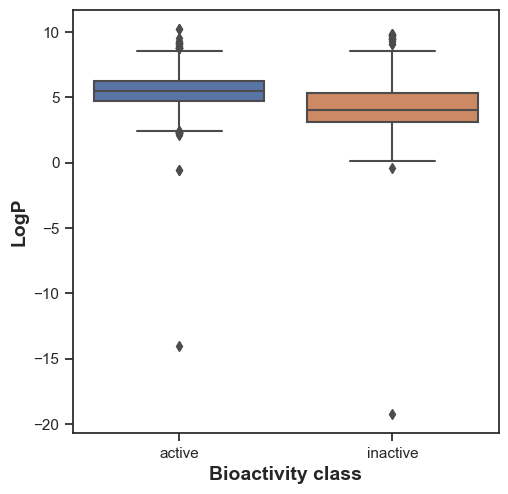

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [34]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,470274.5,2.570646e-36,0.05,Different distribution (reject H0)


#### **NumHDonors**

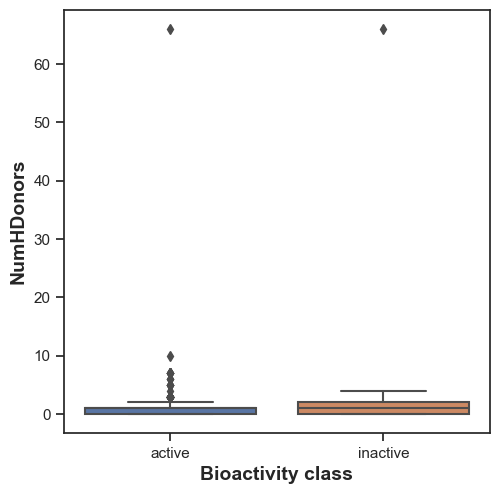

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [36]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,216959.5,7.941702e-21,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

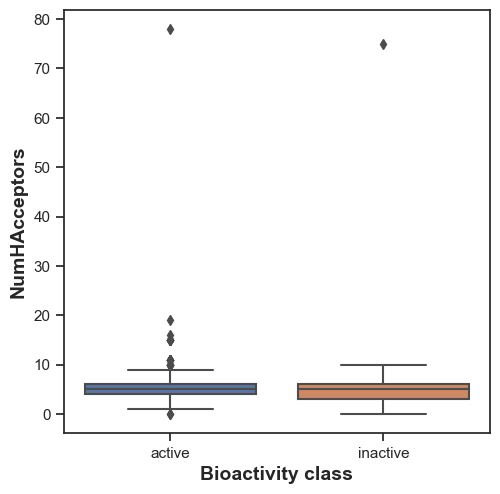

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [38]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,338561.5,0.109192,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

In [39]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: CCR5_bioa_data_preprocessed.csv (deflated 82%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: Output3_C-C chemokine receptor type 5_Inhibitors_3316.csv (deflated 87%)
  adding: output2_C-C chemokine receptor type 5_Inhibitors_3316.csv (deflated 89%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: plot_MW.pdf (deflated 37%)
  adding: final_output.csv (deflated 86%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: output_C-C chemokine receptor type 5_Inhibitors_3316.csv (deflated 87%)
